# 1) Ploting Bitcoin’s ‘Low‘ and its corresponding ‘Quantum’ for the first and last month of trade data available.


Quantum = Difference in low for two consecutive days.


In [62]:
#loading libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.style.use('fivethirtyeight')
import random
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib Inline

In [63]:
#load the dataset
data = pd.read_csv(r"D:\Downloads\coin_Bitcoin.csv")

In [64]:
#checking data shape
data.shape

(2991, 10)

In [65]:
data.tail(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [66]:
#looking at the data
data.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [67]:
#checking data type
data.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [68]:
#converting date type object to datetime64
data['Date'] = data['Date'].astype('datetime64[ns]')

In [69]:
#separating time from date column
data['Dates'] = pd.to_datetime(data['Date']).dt.date
data['Time'] = pd.to_datetime(data['Date']).dt.time
data.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Dates,Time
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29,23:59:59
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30,23:59:59
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01,23:59:59
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02,23:59:59
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03,23:59:59


In [70]:
data.drop(['Date'], axis = 1)

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap,Dates,Time
0,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,2013-04-29,23:59:59
1,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,2013-04-30,23:59:59
2,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,2013-05-01,23:59:59
3,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,2013-05-02,23:59:59
4,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,2013-05-03,23:59:59
...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,2021-07-02,23:59:59
2987,2988,Bitcoin,BTC,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,2021-07-03,23:59:59
2988,2989,Bitcoin,BTC,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,2021-07-04,23:59:59
2989,2990,Bitcoin,BTC,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,2021-07-05,23:59:59


In [71]:
#set date as index
data = data.set_index(pd.DatetimeIndex(data['Date'].values))

In [72]:
#difference in low
data['change_in_low'] = data['Low'].diff()
data.head(3)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Dates,Time,change_in_low
2013-04-29 23:59:59,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09,2013-04-29,23:59:59,NaN
2013-04-30 23:59:59,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09,2013-04-30,23:59:59,0.050003
2013-05-01 23:59:59,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000,116.989998,0.0,1.298955e+09,2013-05-01,23:59:59,-26.330002


In [73]:
#if change in low is negative then return 0, positive means 1
data['Return'] = data['change_in_low'].apply(lambda x: 1 if x >= 0 else 0)

In [74]:
# removing NaN value from rows.
print('Before NaN Drop we have {} rows and {} columns'.format(data.shape[0], data.shape[1]))

data = data.dropna()
print('After NaN Drop we have {} rows and {} columns'.format(data.shape[0], data.shape[1]))

data.head()

Before NaN Drop we have 2991 rows and 14 columns
After NaN Drop we have 2990 rows and 14 columns


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Dates,Time,change_in_low,Return
2013-04-30 23:59:59,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30,23:59:59,0.050003,1
2013-05-01 23:59:59,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01,23:59:59,-26.330002,0
2013-05-02 23:59:59,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02,23:59:59,-15.438103,0
2013-05-03 23:59:59,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03,23:59:59,-13.181900,0
2013-05-04 23:59:59,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09,2013-05-04,23:59:59,13.400002,1


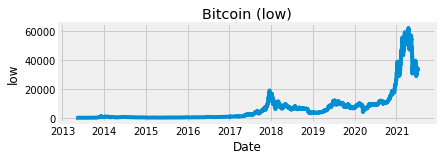

Text(0, 0.5, 'change_in_low')

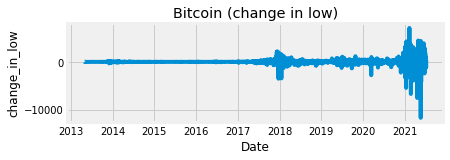

In [75]:
#ploting bitcoin low over the years
#plot 1
dates = data["Date"]
low = data["Low"]
plt.subplot(2,1,1)
plt.plot(dates, low, label="low")
plt.title("Bitcoin (low)")
plt.xlabel("Date")
plt.ylabel("low")
plt.show()

#plot 2
dates= data["Date"]
change_in_low = data["change_in_low"]

plt.subplot(2,1,2)
plt.plot(dates, change_in_low, label="change in low")
plt.title("Bitcoin (change in low)")
plt.xlabel("Date")
plt.ylabel("change_in_low")


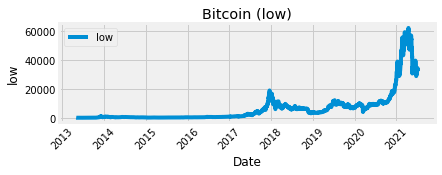

In [76]:
dates = data["Date"]
low = data["Low"]
plt.subplot(2,1,1)
plt.plot(dates, low, label="low")
plt.title("Bitcoin (low)")
plt.xlabel("Date")
plt.ylabel("low")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# for all the years

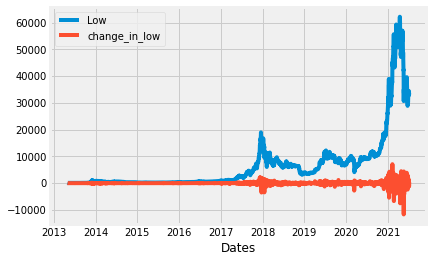

In [77]:
#plotting bitcoin low and change in low for over the years
data.plot(x='Dates', y=['Low', 'change_in_low'])
plt.show()

# For first month

In [78]:
data = data.set_index('Dates') 

In [79]:
#taking only the month of o4- 05 of 2013 
startdate = pd.to_datetime("2013-04-01").date()
enddate = pd.to_datetime("2013-05-30").date()
first_month_data = data.loc[startdate:enddate]


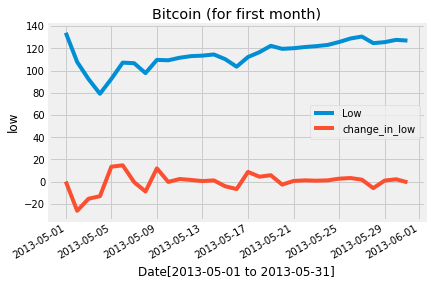

In [80]:
#plotting bitcoin low and change in low for first month of data available 
first_month_data.plot(x='Date', y=['Low', 'change_in_low'])
plt.title("Bitcoin (for first month)")
plt.xlabel("Date[2013-05-01 to 2013-05-31]")
plt.ylabel("low")
plt.show()

# For last month

In [82]:
startdate = pd.to_datetime("2021-07-01").date()
enddate = pd.to_datetime("2021-07-31").date()
last_month_data = data.loc[startdate:enddate]


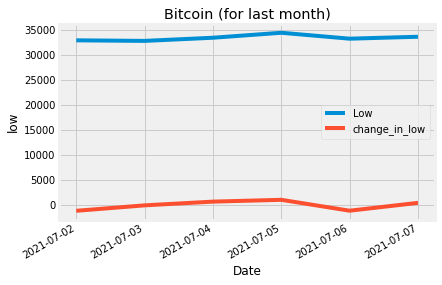

In [83]:
# plotting bitcoin low and change in low for last month of data available
last_month_data.plot(x='Date', y=['Low', 'change_in_low'])
plt.title("Bitcoin (for last month)")
plt.xlabel("Date")
plt.ylabel("low")
plt.show()